In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [6]:
pokemon = pd.read_csv(r'C:\Users\venxr\Udacity_exercises\AIPND-master\Matplotlib\data\pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


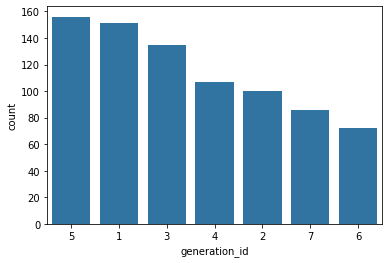

In [14]:
sb.countplot(data = pokemon, x = 'generation_id', color = base_color,
             order =  gen_order);  #order = [5,1,3,4,2,7,6]

In [8]:
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [9]:
base_color = sb.color_palette()[0]

In [10]:
gen_order = pokemon['generation_id'].value_counts().index

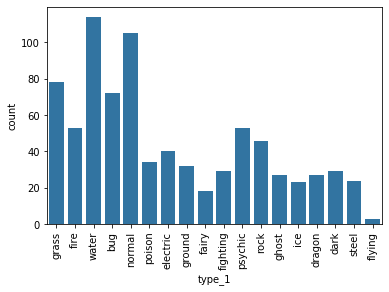

In [11]:
sb.countplot(data = pokemon,  x = 'type_1',
             color = base_color);#order = [5,1,3,4,2,7,6]
plt.xticks(rotation = 90);

In [12]:
#Absolute vs relative frequency

pkmn_types = pokemon.melt(id_vars = ['id', 'species'],                
                          value_vars = ['type_1','type_2'],
                          var_name = 'type_level', value_name = 'type').dropna()

pkmn_types[802:812]


,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


In [17]:
pokemon.isna().sum()

id                   0
species              0
generation_id        0
height               0
weight               0
base_experience      0
type_1               0
type_2             402
hp                   0
attack               0
defense              0
speed                0
special-attack       0
special-defense      0
dtype: int64

(-1.1013649972570692,
 1.109810296336117,
 -1.1024628863899109,
 1.1087124072032752)

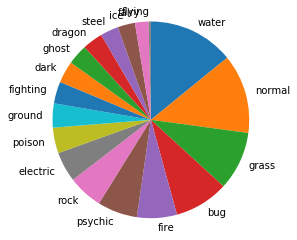

In [18]:
# code for the pie chart seen above
sorted_counts = pokemon['type_1'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square')

(-1.1013649972570692,
 1.109810296336117,
 -1.1024628863899109,
 1.1087124072032752)

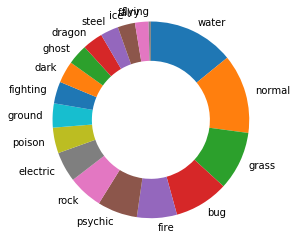

In [19]:
sorted_counts = pokemon['type_1'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square')

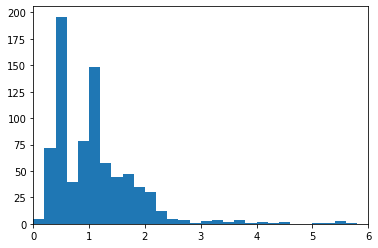

In [21]:
#Descriptive statistics
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data = pokemon, x = 'height', bins = bins);
plt.xlim((0,6));

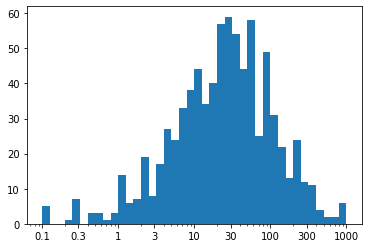

In [29]:
#Scale and transformations
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)
ticks = [0.1, 0.3,1,3,10,30,100,300,1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log');
plt.xticks(ticks, labels);

In [28]:
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64